In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2023-05-15 18:20:53.611469: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-15 18:20:54.703158: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
mnist = tf. keras. datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


2023-05-15 18:20:56.941144: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 18:20:56.985342: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)
model.save('handwritten.model')

Epoch 1/10


2023-05-15 18:20:57.271505: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.2609 - accuracy: 0.9232
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1080 - accuracy: 0.9665
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0731 - accuracy: 0.9775
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0536 - accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0409 - accuracy: 0.9868
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0318 - accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0239 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0210 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0180 - accuracy: 0.9938
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0146 - accurac

INFO:tensorflow:Assets written to: handwritten.model/assets


INFO:tensorflow:Assets written to: handwritten.model/assets


In [6]:
model = tf.keras.models.load_model('handwritten.model')
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.1024 - accuracy: 0.9755
0.10244425386190414


In [7]:
print(accuracy)

0.9754999876022339


1/1 [==============================] - 0s 131ms/step
This digit is probably a 6


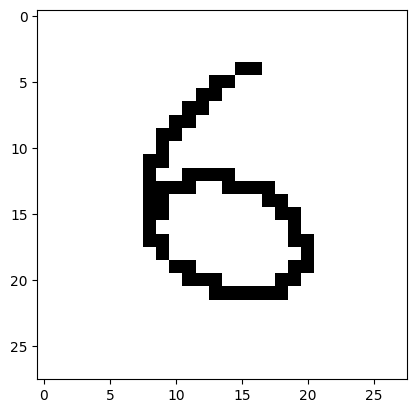

1/1 [==============================] - 0s 25ms/step
This digit is probably a 2


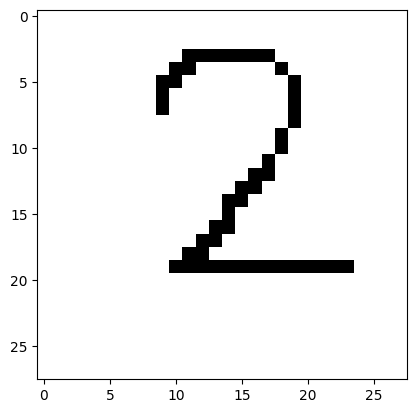

1/1 [==============================] - 0s 44ms/step
This digit is probably a 4


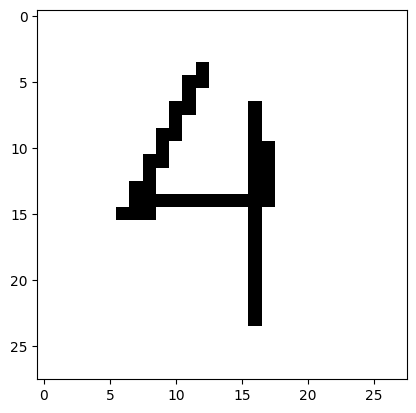

1/1 [==============================] - 0s 20ms/step
This digit is probably a 3


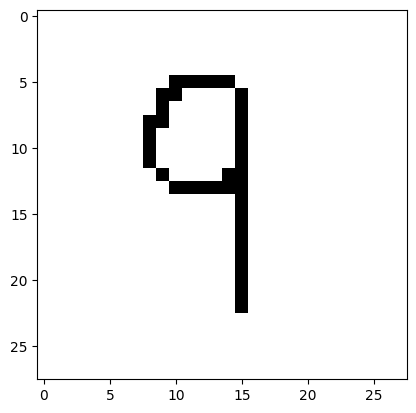

1/1 [==============================] - 0s 26ms/step
This digit is probably a 5


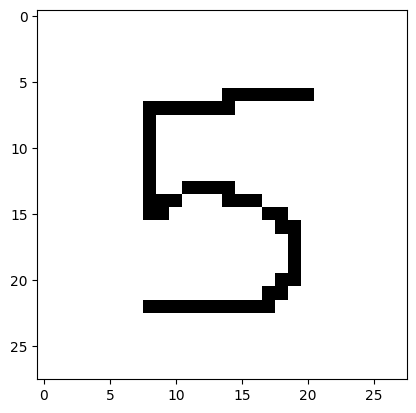

In [8]:
image_number = 1
while os.path.isfile(f"digits/digit{image_number}.png"):
  try:  
    img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"This digit is probably a {np.argmax(prediction)}")
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
  except:
    print("Error!")
  finally:
    image_number += 1